## Mini Jupyter Exercise #1

We first create arrays containing GDP data and years. In this solution, the arrays are being created as `numpy` arrays since we will be performing computations on these arrays. We then plot the data as a line graph (with markers) using the `pyplot` module within the `matplotlib` library.

### Plotting of GDP Data

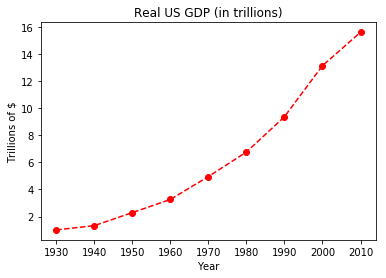

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# input GDP and Years data
year = np.array([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
gdp = np.array([1.015, 1.33, 2.29, 3.26, 4.951, 6.759, 9.366, 13.131, 15.599])

# plot
plt.plot(year, gdp, color='red', marker='o', linestyle='dashed')
plt.title('Real US GDP (in trillions)')
plt.xlabel('Year')
plt.ylabel('Trillions of $')
plt.savefig("GDP_vs_Yr", dpi=300)
plt.show()

### Discussion and Analysis

*Note:* The following discussion and analysis is meant to convey a comprehensive approach to solving this **regression** problem. Regression will be formally studied in the class and most students are in fact *not* expected to have gotten close to this solution. Students' submissions will primarily be evaluated based on their effort and the final set of plots (regardless of their accuracy).

#### Basic Mathematical Modeling
Let us denote the year as $x$ and the GDP for the year as $y$. Note that we need to think of *year* as starting from 0, as the relationship should be independent of the absolute number. Looking at the plot above, it **appears** that the relationship between $y$ and $x$ is exponential and we can model this relationship as follows:

$$y = f(x) \qquad \Leftrightarrow \qquad y = \theta^x. \qquad (1)$$

> **Caution:** Strictly speaking, we should be stating that $y = f(x) + \epsilon$, where $\epsilon$ is referred to as the additive modeling error in regression analysis. Only if the data actually comes from the class of functions that we are considering will the modeling error $\epsilon$ be zero. We will, however, ignore this modeling error in the following for simplicity. Please consult with your instructor if you have trouble understanding this concept.

In other words, we are saying that the class of models that we should consider for the relationship between GDP and years is exponential, given by:

$$\mathcal{F} = \{f : \mathbb{R} \rightarrow \mathbb{R} \ | \ f(x) = \theta^x, \theta > 0\}. \qquad (2)$$

> **Note:** Please make sure you are comfortable reading the mathematical notation given in (2). You can reach out to your instructor if you have trouble doing so.

We also have access to nine data samples: $(y_i, x_i), i=1,\dots,9.$ In other words, we have $N = 9$.

#### Setting-up and Solving the Problem

Our goal is to learn an $\widehat{f}$ such that $\widehat{f}$ is as close to $f$ as possible. Since the class of functions in this problem is described by a single parameter $\theta$, we can equivalently think of the problem as obtaining an estimate $\widehat{\theta}$ that is as close to $\theta$ as possible. While this problem might seem challenging, it can be simplified by taking $\log$ (in any base) on both sides of (1), which results in:

$$\log(y) = x \log(\theta). \qquad (3)$$

If we now define new variables $\tilde{y} = \log(y)$ and $\tilde{\theta} = \log(\theta)$ then we effectively have the following *linear* relationship between the transformed variables:

$$\tilde{y} = x \tilde{\theta}. \qquad (4)$$

Notice that knowing $\tilde{\theta}$ is equivalent to knowing $\theta$, since $\theta = \exp(\tilde{\theta})$, where we have assumed that the $\log$ is in base $e$. We also have $N=9$ data points in this transformed problem, given by $\{(\tilde{y}_i, x_i)\}_{i=1}^9$ with $\tilde{y}_i = \log(y_i)$. We now form two vectors $\tilde{\mathbf{y}} \in \mathbb{R}^9$ and $\mathbf{x} \in \mathbb{R}^9$ as follows:

$$\tilde{\mathbf{y}} = \begin{bmatrix}\tilde{y}_1\\ \tilde{y}_2\\ \vdots\\ \tilde{y}_9\end{bmatrix}, \quad \text{and} \quad \mathbf{x} = \begin{bmatrix}x_1\\ x_2\\ \vdots\\ x_9\end{bmatrix}. \qquad (5)$$

We then have from (4) and (5) the following equation:

$$\tilde{\mathbf{y}} = \mathbf{x} \tilde{\theta}. \qquad (6)$$

We have $\tilde{\theta}$ as unknown in (6), which is an overdetermined linear system of equations with one unknown. One way to solve (6) for $\tilde{\theta}$ is using the least squares formulation, which focuses on the so-called $\ell_2$-loss function:

$$\hat{\tilde{\theta}} = \arg\min_{\tilde{\theta}} \|\mathbf{x} \tilde{\theta} - \tilde{\mathbf{y}}\|_2^2. \qquad (7)$$

> **Note:** The notation $\|\mathbf{v}\|_2$ for a vector $\mathbf{v} \in \mathbb{R}^N$ is defined as: $\|\mathbf{v}\|_2 = \sqrt{v_1^2 + \dots + v_N^2}$. This is called the $\ell_2$-norm of a vector and is effectively the length of a vector in the conventional sense. Note also that $\mathbf{v}^T \mathbf{v} = \|\mathbf{v}\|_2^2$.

In linear algebra, the solution to (7) is given by:

$$\hat{\tilde{\theta}} = \mathbf{x}^T \tilde{\mathbf{y}}/(\mathbf{x}^T \mathbf{x}) = \mathbf{x}^T \tilde{\mathbf{y}}/\|\mathbf{x}\|_2^2. \qquad (8)$$

Finally, we obtain:

$$\widehat{\theta} = \exp(\hat{\tilde{\theta}}). \qquad (9)$$

Combining (8) and (9), we see that:

$$\widehat{f}(x) = \left(\exp\left(\frac{\mathbf{x}^T \tilde{\mathbf{y}}}{\|\mathbf{x}\|_2^2}\right)\right)^x. \qquad (10)$$

### Recapping

This is a very simple example of a machine learning (and statistics) regression problem. The four main ingredients of this problem, as discussed in class, are:

1. **Mathematical model:** Here, the mathematical model is taken to be exponential, as given by (1) and (2).
2. **Data:** Here, we are given $N=9$ data samples in terms of pairs; note, however, that we will need to do some *preprocessing* of these samples to account for the fact that the year needs to start from 0.
3. **Loss function:** The loss function being considered here is based on loss between the actual and the estimated values of the transformed GDP data; the loss function is known as $\ell_2$ loss here (see, e.g., (7)).
4. **Computational algorithm:** While we could have used a computational algorithm to solve (7), this is such a simple example that we can in fact reach a closed-form solution, which is given by (8).

### Final Calculations and Plot

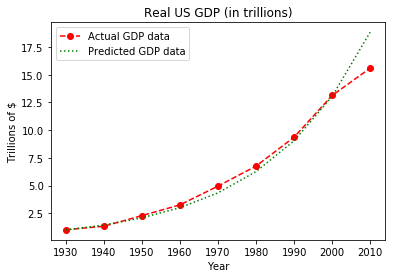

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
from IPython.display import display, Latex

# preprocessing and transformation of data
base_yr = 1930 # Base year
x = year - base_yr # subtraction of base year to ensure that the first year is '0'
y_tilde = np.log(gdp) # transformation of GDP data

# estimation of theta_tilde (effectively, theta in the log domain)
theta_tilde_hat = x.dot(y_tilde)/(x.dot(x))

# estimation of theta
theta_hat = np.exp(theta_tilde_hat)

# plot
plt.plot(year, gdp, color='red', marker='o', linestyle='dashed')
plt.plot(year, theta_hat**x, color='green', linestyle='dotted')
plt.title('Real US GDP (in trillions)')
plt.xlabel('Year')
plt.ylabel('Trillions of $')
plt.legend(('Actual GDP data', 'Predicted GDP data'))
plt.show()

# final display
display(Latex(r'Solution: $\widehat\theta$ = {}, which translates into {}$\%$ GDP growth per year.'
              .format(round(theta_hat,3),round((theta_hat-1)*100,2))))
display(Latex(r'According to this analysis, the real US GDP in 2020 should be \${} trillions.'
              .format(round(theta_hat**(2020-1930),3))))